# 🤖 Machine Learning Project

**Author:** Kristine Steele

**Date:** 10/05/2025

**Repository:** [GitHub Project Repository](https://github.com/ksteele3712/datafun-07_ml)

---

## Project Overview

This project demonstrates how we can make a "line of best fit" to model the meaning of our data. It is a sort of cause and effect pattern. Consequently, our line is relatively predictive in nature, helping us to see likely future results depending on our input.

## Python Cell Imports

In [1]:
# Step 1: Update pip, setuptools, and wheel
# py -m pip install --upgrade pip setuptools wheel

# Step 2: Install from requirements.txt (recommended approach)
# py -m pip install --upgrade -r requirements.txt --timeout 100

# Step 3: Or install individual packages for machine learning
# Core data analysis packages
# py -m pip install pandas numpy matplotlib seaborn

# Machine learning packages  
# py -m pip install scikit-learn statsmodels

# Jupyter notebook support
# py -m pip install jupyter ipython ipykernel ipywidgets

# Optional: Interactive plotting
# py -m pip install plotly

# Optional: Advanced Excel support
# py -m pip install openpyxl xlsxwriter

# Optional: Text processing 
# py -m pip install nltk

print("Run the commented pip install commands in your terminal to install required packages")

Run the commented pip install commands in your terminal to install required packages


In [2]:
# Core data analysis and numerical computing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Standard library imports
import math
import statistics
from pathlib import Path

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

print("All packages imported successfully! 📊🤖")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All packages imported successfully! 📊🤖
Pandas version: 2.3.3
NumPy version: 2.3.3
Matplotlib version: 3.10.6


## Part 1 - Simple Linear Regression

Using a technique called **simple linear regression**, we'll make predictions by finding a linear relationship between the months (January of each year) and New York City's average January high temperatures. Given a collection of values representing an **independent variable** (the month/year combination) and a **dependent variable** (the average high temperature for that month/year), simple linear regression describes the relationship between these variables with a straight line, known as the **regression line**.

NYC Temperature Data Sample:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
5  190001   37.4      0.0
6  190101   37.0     -0.4
7  190201   35.0     -2.4
8  190301   35.5     -1.9
9  190401   29.8     -7.6

Dataset shape: (124, 3)
Columns: ['Date', 'Value', 'Anomaly']

Date range: 1895 to 2018
Temperature range: 26.1°F to 47.6°F

Linear Regression Results:
Slope (coefficient): 0.0148 degrees F per year
Y-intercept: 8.6950 degrees F
R-squared score: 0.0137


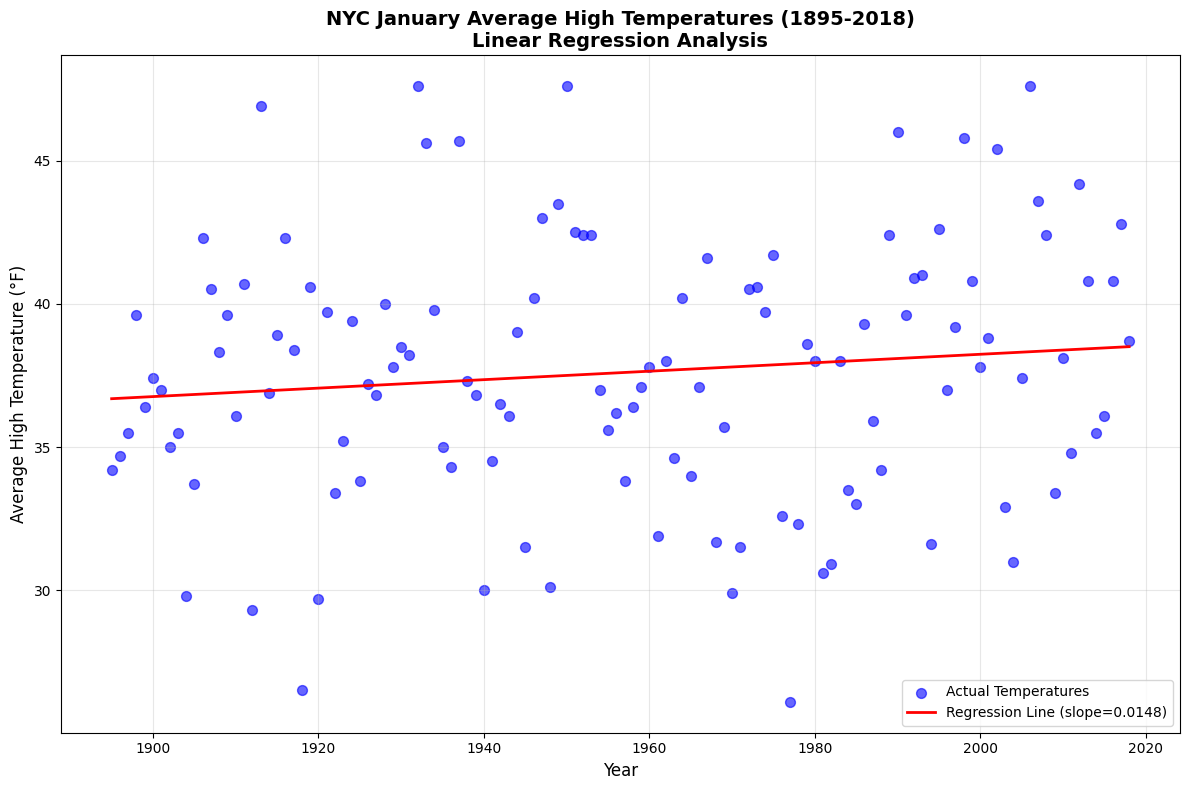


Interpretation:
The temperature is increasing by 0.0148 degrees F per year on average


In [7]:
# Load and analyze NYC temperature data
# Read the NYC temperature data
nyc_data = pd.read_csv('examples/ch10/ave_hi_nyc_jan_1895-2018.csv')

# Display the first few rows to understand the data structure
print("NYC Temperature Data Sample:")
print(nyc_data.head(10))
print(f"\nDataset shape: {nyc_data.shape}")
print(f"Columns: {list(nyc_data.columns)}")

# Create year column from Date (extract first 4 digits)
nyc_data['Year'] = nyc_data['Date'].astype(str).str[:4].astype(int)

# Display data info
print(f"\nDate range: {nyc_data['Year'].min()} to {nyc_data['Year'].max()}")
print(f"Temperature range: {nyc_data['Value'].min()}°F to {nyc_data['Value'].max()}°F")

# Prepare data for linear regression
X = nyc_data['Year'].values.reshape(-1, 1)  # Independent variable (needs to be 2D for sklearn)
y = nyc_data['Value'].values                # Dependent variable

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Print model statistics
print(f"\nLinear Regression Results:")
print(f"Slope (coefficient): {model.coef_[0]:.4f} degrees F per year")
print(f"Y-intercept: {model.intercept_:.4f} degrees F")
print(f"R-squared score: {model.score(X, y):.4f}")

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(nyc_data['Year'], nyc_data['Value'], alpha=0.6, color='blue', s=50, label='Actual Temperatures')
plt.plot(nyc_data['Year'], y_pred, color='red', linewidth=2, label=f'Regression Line (slope={model.coef_[0]:.4f})')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average High Temperature (°F)', fontsize=12)
plt.title('NYC January Average High Temperatures (1895-2018)\nLinear Regression Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Add some styling
plt.tight_layout()

# Display the plot
plt.show()

print(f"\nInterpretation:")
if model.coef_[0] > 0:
    print(f"The temperature is increasing by {model.coef_[0]:.4f} degrees F per year on average")
else:
    print(f"The temperature is decreasing by {abs(model.coef_[0]):.4f} degrees F per year on average")

---

# 🎯 **THIS IS MACHINE LEARNING!** 

## **Understanding What We Just Accomplished**

**What we just performed above is EXACTLY what machine learning is all about!** Let's break down the key components:

### 🤖 **Supervised Learning in Action:**
- **Training Data**: We used historical NYC temperature data (1895-2018) 
- **Algorithm**: Linear Regression (one of the fundamental ML algorithms)
- **Learning Process**: The model "learned" the relationship between years and temperatures
- **Prediction Capability**: Our trained model can now predict future temperatures

### 📊 **The Machine Learning Workflow:**
1. **Data Collection** → We loaded real-world temperature data
2. **Data Preparation** → We formatted years (X) and temperatures (y) 
3. **Model Training** → `model.fit(X, y)` - the machine "learned" from our data
4. **Prediction** → `model.predict(X)` - the model makes predictions
5. **Evaluation** → R-squared score shows how well our model performs

### 🎯 **Key Machine Learning Concepts Demonstrated:**
- **Independent Variable (X)**: Year (what we use to predict)
- **Dependent Variable (y)**: Temperature (what we want to predict)
- **Model Parameters**: Slope and intercept (learned automatically!)
- **Supervised Learning**: We provided both inputs AND correct outputs for training

**This linear regression model is now a "trained machine learning model" that can predict NYC January temperatures for future years based on the historical pattern it learned!**

---

## Linear Relationships

To understand the general concept of a linear relationship, consider Fahrenheit and Celsius temperatures. Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula:

**c = 5 / 9 * (f - 32)**

In this formula, **f** (the Fahrenheit temperature) is the *independent variable*, and **c** (the Celsius temperature) is the *dependent variable*—each value of **c** *depends on* the value of **f** used in the calculation.

Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line. To show this, let's first create a lambda for the preceding formula and use it to calculate the Celsius equivalents of the Fahrenheit temperatures 0–100 in 10-degree increments. We store each Fahrenheit/Celsius pair as a tuple in `temps`:

🌡️ Fahrenheit to Celsius Conversion:
0°F = -17.8°C
10°F = -12.2°C
20°F = -6.7°C
30°F = -1.1°C
40°F = 4.4°C
50°F = 10.0°C
60°F = 15.6°C
70°F = 21.1°C
80°F = 26.7°C
90°F = 32.2°C
100°F = 37.8°C


C:\Users\ksteele\AppData\Local\Temp\ipykernel_16288\2800604787.py:21: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Repos\datafun-07_ml\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


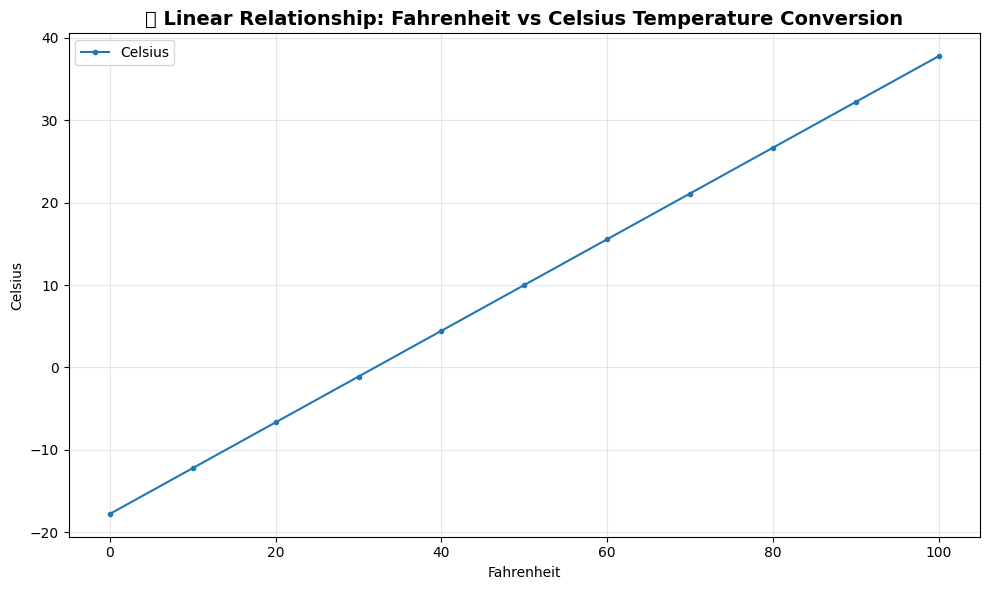


📊 This demonstrates a perfect linear relationship with:
Slope: 0.5556 (each degree Fahrenheit = 0.5556 degrees Celsius)
Y-intercept: -17.8°C (when F=0, C=-17.8)


In [8]:
# Create a lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Generate temperature pairs for Fahrenheit temperatures 0-100 in 10-degree increments
temps = [(f, c(f)) for f in range(0, 101, 10)]

print("🌡️ Fahrenheit to Celsius Conversion:")
for fahrenheit, celsius in temps:
    print(f"{fahrenheit}°F = {celsius:.1f}°C")

# Create a DataFrame for plotting
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the linear relationship
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-', figsize=(10, 6))
y_label = axes.set_ylabel('Celsius')

# Enhance the plot
plt.title('🌡️ Linear Relationship: Fahrenheit vs Celsius Temperature Conversion', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 This demonstrates a perfect linear relationship with:")
print(f"Slope: {5/9:.4f} (each degree Fahrenheit = {5/9:.4f} degrees Celsius)")
print(f"Y-intercept: {-32*5/9:.1f}°C (when F=0, C={-32*5/9:.1f})")

## Part 2 - Prediction

In this section, we'll build a comprehensive machine learning model using NYC temperature data to make predictions. We'll follow the complete data science workflow from data acquisition to visualization.

### Section 1 - Data Acquisition

Load the NYC January high temperature data from the CSV file into a DataFrame for analysis.

In [12]:
# Load NYC January high temperature data
nyc_df = pd.read_csv('examples/ch10/ave_hi_nyc2_jan_1895-2018.csv')

print("Data loaded successfully!")
print(f"Dataset shape: {nyc_df.shape}")
print(f"Columns: {list(nyc_df.columns)}")

Data loaded successfully!
Dataset shape: (124, 3)
Columns: ['Date', 'Value', 'Anomaly']


### Section 2 - Data Inspection

Examine the structure and contents of our dataset using head() and tail() methods.

In [13]:
# View the first few rows of the dataset
print("First 10 rows of the dataset:")
print(nyc_df.head(10))

print("\n" + "="*50)

# View the last few rows of the dataset  
print("Last 10 rows of the dataset:")
print(nyc_df.tail(10))

print(f"\nData types:")
print(nyc_df.dtypes)

First 10 rows of the dataset:
   Date  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0
5  1900   37.4      0.0
6  1901   37.0     -0.4
7  1902   35.0     -2.4
8  1903   35.5     -1.9
9  1904   29.8     -7.6

Last 10 rows of the dataset:
     Date  Value  Anomaly
114  2009   33.4     -4.0
115  2010   38.1      0.7
116  2011   34.8     -2.6
117  2012   44.2      6.8
118  2013   40.8      3.4
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3

Data types:
Date         int64
Value      float64
Anomaly    float64
dtype: object


### Section 3 - Data Cleaning

Clean and prepare the data by improving column names and ensuring proper data types.

In [14]:
# Clean column names for better readability
print("Original columns:", list(nyc_df.columns))

# Rename columns to be more descriptive
nyc_df = nyc_df.rename(columns={
    'Date': 'Year', 
    'Value': 'Temperature',
    'Anomaly': 'Temperature_Anomaly'
})

print("Cleaned columns:", list(nyc_df.columns))

# Ensure Year is integer type
nyc_df['Year'] = nyc_df['Year'].astype(int)

# Check for any missing values
print(f"\nMissing values per column:")
print(nyc_df.isnull().sum())

print(f"\nCleaned dataset info:")
print(f"Date range: {nyc_df['Year'].min()} to {nyc_df['Year'].max()}")
print(f"Temperature range: {nyc_df['Temperature'].min()}°F to {nyc_df['Temperature'].max()}°F")

Original columns: ['Date', 'Value', 'Anomaly']
Cleaned columns: ['Year', 'Temperature', 'Temperature_Anomaly']

Missing values per column:
Year                   0
Temperature            0
Temperature_Anomaly    0
dtype: int64

Cleaned dataset info:
Date range: 1895 to 2018
Temperature range: 26.1°F to 47.6°F


### Section 4 - Descriptive Statistics

Calculate and display basic descriptive statistics for our dataset.

In [15]:
# Set display precision to 2 decimal places as requested
pd.set_option('display.precision', 2)

# Calculate descriptive statistics using describe()
print("Descriptive Statistics for NYC Temperature Data:")
print("=" * 50)
print(nyc_df.describe())

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"Mean temperature: {nyc_df['Temperature'].mean():.2f}°F")
print(f"Median temperature: {nyc_df['Temperature'].median():.2f}°F")  
print(f"Standard deviation: {nyc_df['Temperature'].std():.2f}°F")
print(f"Temperature variance: {nyc_df['Temperature'].var():.2f}")
print(f"Total years of data: {len(nyc_df)} years")

Descriptive Statistics for NYC Temperature Data:
          Year  Temperature  Temperature_Anomaly
count   124.00       124.00               124.00
mean   1956.50        37.60                 0.20
std      35.94         4.54                 4.54
min    1895.00        26.10               -11.30
25%    1925.75        34.58                -2.82
50%    1956.50        37.60                 0.20
75%    1987.25        40.60                 3.20
max    2018.00        47.60                10.20

Additional Statistics:
Mean temperature: 37.60°F
Median temperature: 37.60°F
Standard deviation: 4.54°F
Temperature variance: 20.61
Total years of data: 124 years


### Section 5 - Build the Model

Use linear regression to calculate the slope and intercept for the best fit line through our temperature data.

In [16]:
# Import scipy.stats for linregress function
from scipy import stats

# Prepare data for linear regression
X = nyc_df['Year'].values
y = nyc_df['Temperature'].values

# Use scipy.stats linregress function to calculate slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print("Linear Regression Model Results:")
print("=" * 40)
print(f"Slope: {slope:.6f} °F per year")
print(f"Intercept: {intercept:.2f} °F")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard error: {std_err:.6f}")

# Create predictions using the model
y_pred = slope * X + intercept

print(f"\nModel equation: Temperature = {slope:.6f} * Year + {intercept:.2f}")
print(f"This means temperature changes by {slope:.4f}°F per year on average")

Linear Regression Model Results:
Slope: 0.014771 °F per year
Intercept: 8.69 °F
R-value (correlation coefficient): 0.1169
R-squared: 0.0137
P-value: 0.195867
Standard error: 0.011358

Model equation: Temperature = 0.014771 * Year + 8.69
This means temperature changes by 0.0148°F per year on average


### Section 6 - Predict

Use our trained model to predict the average high temperature in January for the year 2024.

In [17]:
# Predict the average high temperature in January for 2024
prediction_year = 2024
predicted_temp_2024 = slope * prediction_year + intercept

print("Temperature Prediction for 2024:")
print("=" * 35)
print(f"Year: {prediction_year}")
print(f"Predicted average high temp in January: {predicted_temp_2024:.2f}°F")

# Compare with recent years for context
recent_years = [2015, 2016, 2017, 2018]
print(f"\nFor comparison, recent actual temperatures:")
for year in recent_years:
    if year in nyc_df['Year'].values:
        actual_temp = nyc_df[nyc_df['Year'] == year]['Temperature'].iloc[0]
        predicted_temp = slope * year + intercept
        print(f"{year}: Actual = {actual_temp}°F, Model predicted = {predicted_temp:.2f}°F")

# Show prediction confidence
print(f"\nModel Performance:")
print(f"R-squared = {r_value**2:.4f} (higher is better, max = 1.0)")
print(f"This model explains {r_value**2*100:.1f}% of the temperature variation")

Temperature Prediction for 2024:
Year: 2024
Predicted average high temp in January: 38.59°F

For comparison, recent actual temperatures:
2015: Actual = 36.1°F, Model predicted = 38.46°F
2016: Actual = 40.8°F, Model predicted = 38.47°F
2017: Actual = 42.8°F, Model predicted = 38.49°F
2018: Actual = 38.7°F, Model predicted = 38.50°F

Model Performance:
R-squared = 0.0137 (higher is better, max = 1.0)
This model explains 1.4% of the temperature variation


### Section 7 - Visualizations

Create professional scatter plots with best fit lines using Seaborn to visualize our data and model predictions.